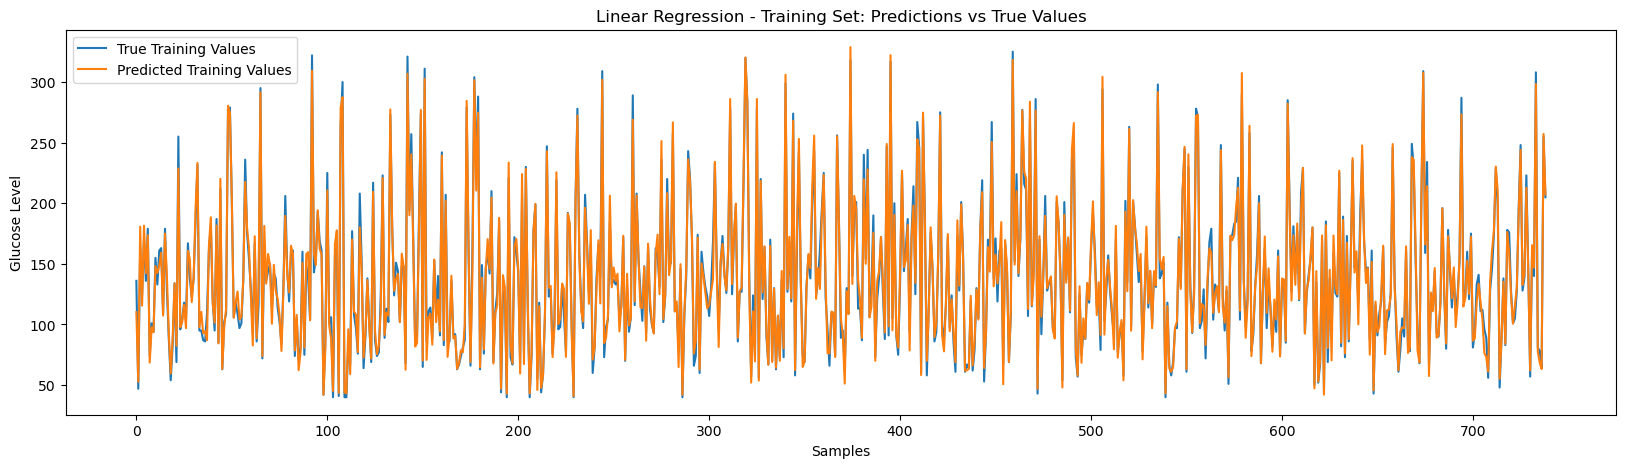

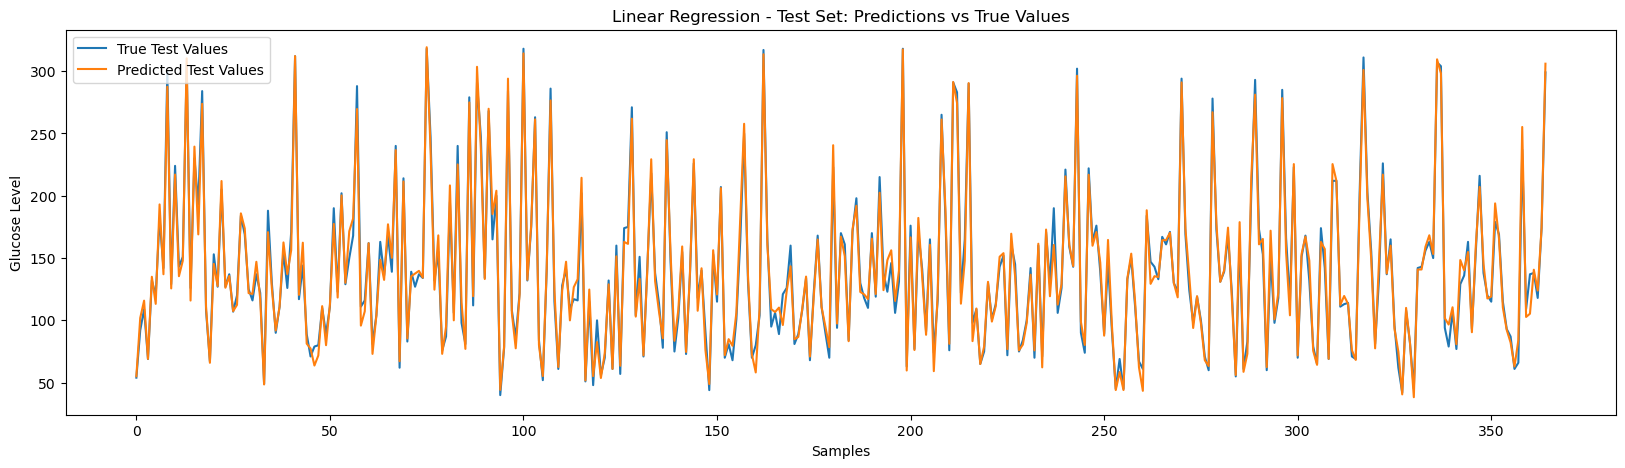

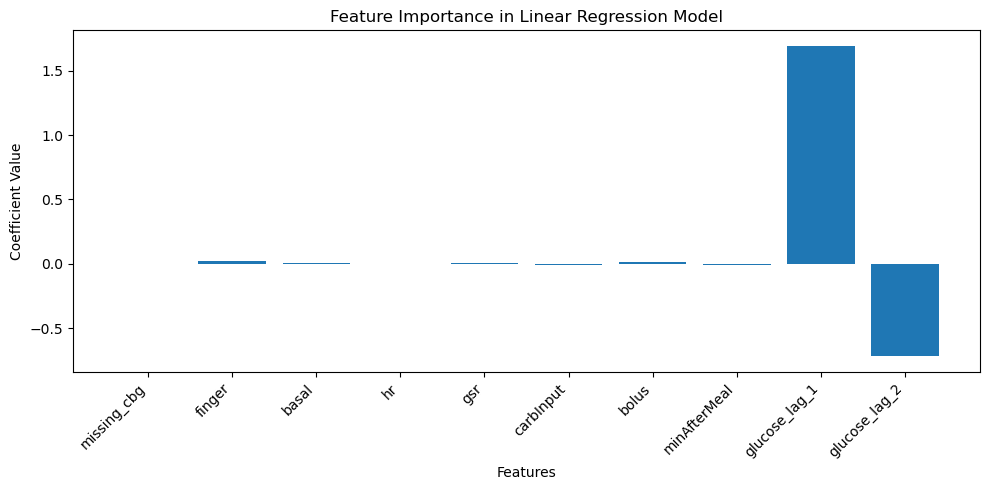

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from helperFunctions import createDataSet

# Load the dataset
file = "../../data/Ohio2020_processed/train/540-ws-training_processed.csv"
data_list = createDataSet(file)

# Concatenate all sub-dataframes from createDataSet output into a single DataFrame
data = pd.concat(data_list, axis=0).reset_index(drop=True)

# Split the dataset into training and testing
X = data.drop(["cbg"], axis=1)
y = data["cbg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

# Make predictions
y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

# Inverse transform predictions and true values
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_train_inv = scaler_y.inverse_transform(y_train_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# Plot training results
plt.figure(figsize=(20, 5))
plt.plot(y_train_inv, label="True Training Values")
plt.plot(y_train_pred, label="Predicted Training Values")
plt.xlabel("Samples")
plt.ylabel("Glucose Level")
plt.title("Linear Regression - Training Set: Predictions vs True Values")
plt.legend()
plt.show()

# Plot test results
plt.figure(figsize=(20, 5))
plt.plot(y_test_inv, label="True Test Values")
plt.plot(y_test_pred, label="Predicted Test Values")
plt.xlabel("Samples")
plt.ylabel("Glucose Level")
plt.title("Linear Regression - Test Set: Predictions vs True Values")
plt.legend()
plt.show()

# Plot feature importances (coefficients)
plt.figure(figsize=(10, 5))
plt.bar(X.columns.values, model.coef_[0])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Linear Regression Model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
